In [10]:
#baixando scikit-learn na máquina
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\gusaz\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("heart_data.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#importa função que separa amostra entre treino e teste
from sklearn.model_selection import train_test_split

X = heart[list(heart.columns)[0:13]] # Features/inputs

Y = heart["target"] # Label/variável de interesse para classificação

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) # 75% training and 25% test

In [4]:
#importando modelo de random forest
from sklearn.ensemble import RandomForestClassifier

#criando modelo e treinando com a amostra de treino
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

#testando o modelo com amostra de teste
Y_pred = rf.predict(X_test)

In [5]:
#importando função para cálculo de acurácia do modelo
from sklearn import metrics

#calculando acurácia, com qual frequência o modelo acerta?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Score:", rf.score(X_test, Y_test))

Accuracy: 0.7763157894736842
Score: 0.7763157894736842


In [8]:
#cross validation do modelo
from sklearn.model_selection import cross_val_score
#inputamos os features e a label, escolhemos o numero de estimadores e quantos folds para a cross validation
#é retornado um array, em que cada entrada é acurácia para cada modelo em cada fold
cross_val_score(RandomForestClassifier(n_estimators=40), X, Y, cv=3)

array([0.84158416, 0.84158416, 0.79207921])

<AxesSubplot:>

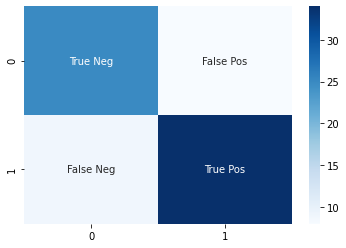

In [17]:
#matriz de confusão - entender quantas observações foram classificadas de forma correta
from sklearn.metrics import confusion_matrix

matrix_conf_rf = confusion_matrix(Y_test, Y_pred)
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix_conf_rf, annot=labels, fmt="", cmap='Blues')

In [13]:
confusion_matrix(Y_test, Y_pred)

array([[25,  8],
       [ 9, 34]], dtype=int64)